In [6]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import imutils
from tensorflow.keras.preprocessing.image import img_to_array

In [18]:
Categories = ["Covid-19", "Normal", "Pneumonia"]

File_path = "/content/drive/MyDrive/Chest X-ray Image_new/train/Pneumonia/Viral Pneumonia (1033).png"

In [3]:
def prepare(File_Path):
  Image_size = 224
  Image_array = cv2.imread(File_Path) 
  Image_array = cv2.cvtColor(Image_array, cv2.COLOR_BGR2RGB)
  new_array = cv2.resize(Image_array, (Image_size, Image_size))
  image = new_array.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  return image

In [4]:
model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/my_model.h5")

In [19]:
 Prediction = model.predict([prepare(File_path)])

In [20]:
print(Prediction)

pred_class = np.argmax(Prediction, axis=-1)
print(pred_class)

[[0.00695992 0.07834287 0.91469723]]
[2]


In [21]:
print(Categories[int(np.argmax(Prediction[0]))])

Pneumonia


In [22]:
img = cv2.imread(File_path)
new_img = cv2.resize(img, (224, 224))
# Using cv2.putText() method 
image = cv2.putText(new_img, Categories[int(np.argmax(Prediction[0]))] , (25,25), cv2.FONT_HERSHEY_SIMPLEX , 1, (255,0,0), 2, cv2.LINE_AA) 

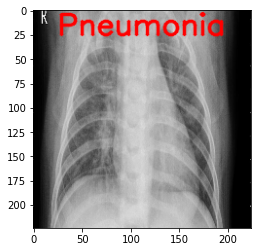

In [23]:
plt.imshow(image)
plt.show()